# Benchmarcks and plots of SVM RL optim envs

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pickle

In [5]:
## All the data stored in the run folder file
run = 'run_0/'
name_dir = 'runs_optim_envs/'+run

## print info of this run
info = pickle.load(open(name_dir+'info.p', 'rb'))
for k in info.keys():
    print(k, ' : ', info[k])

alg  :  DDPG
env  :  svmEnv-v2
basis_size  :  50
batch_size  :  1
bootstrap_size  :  1
gamma  :  1.0
tau  :  0.001
lr_critic  :  0.0001
lr_actor  :  0.0001
update_every  :  1
transfer_every  :  1
num_update  :  1
add_noise_every  :  1


In [6]:
## Example of data stored and number of episodes
rew_files = name_dir+'rew*'
num_ep = len(glob.glob(rew_files))
print('The number of episodes is then:', num_ep)

The number of episodes is then: 10


The max score is at episode 6 and is equal to 66.1568954593251
The min score is at episode 0 and is equal to 38.73622629671324


Text(0.5, 0, 'Episode #')

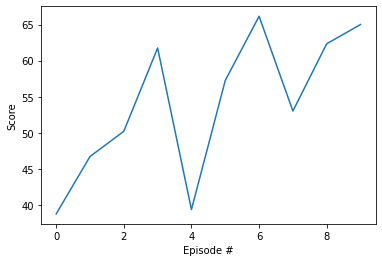

In [7]:
## Score data analysis

scores = np.zeros(num_ep)
for i in range(num_ep):
    rew = pickle.load(open(name_dir+f'rew_{i}.p', 'rb'))
    scores[i] = np.sum(rew)
    
## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print(f'The max score is at episode {index_max} and is equal to {scores[index_max]}')
print(f'The min score is at episode {index_min} and is equal to {scores[index_min]}')
    
## Plot scores    
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

This episode collected a score of =  66.1568954593251


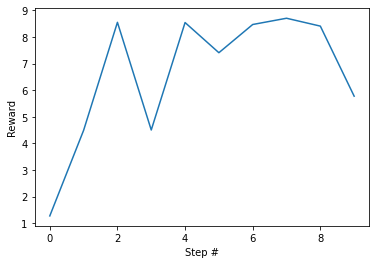

In [8]:
## Rewards of episode with max score
file_rew_max = name_dir+f'rew_{index_max}.p'
rew_max = pickle.load(open(file_rew_max, 'rb'))
plt.plot(np.arange(len(rew_max)), rew_max)
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(rew_max))

The last energy of the episode with max score is =  -0.0897058


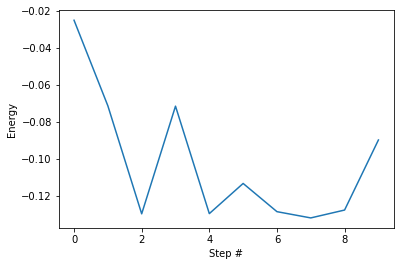

In [9]:
## Plot energies of episode with max score
file_en_max = name_dir+f'en_{index_max}.p'
en_max = pickle.load(open(file_en_max, 'rb'))
plt.plot(np.arange(len(en_max)), en_max)
plt.ylabel('Energy')
plt.xlabel('Step #')

print('The last energy of the episode with max score is = ', en_max[-1])

The last prin dim of the episode with max score is =  49


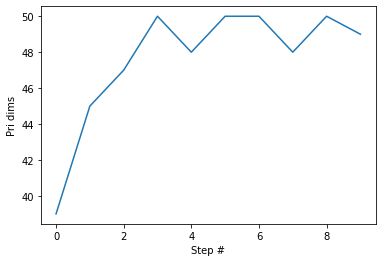

In [10]:
## Plot princip dim of episode with max score

file_pri_max = name_dir+f'pri_dim_{index_max}.p'
pri_max = pickle.load(open(file_pri_max, 'rb'))
plt.plot(np.arange(len(pri_max)), pri_max)
plt.ylabel('Pri dims')
plt.xlabel('Step #')

print('The last prin dim of the episode with max score is = ', pri_max[-1])

The last full dim of the episode with max score is =  50


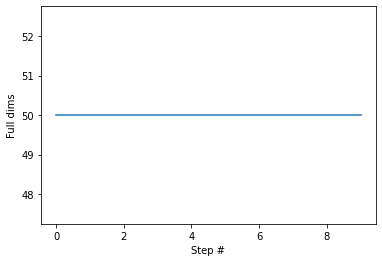

In [11]:
## Plot full dim of episode with max score

file_full_max = name_dir+f'full_dim_{index_max}.p'
full_max = pickle.load(open(file_full_max, 'rb'))
plt.plot(np.arange(len(full_max)), full_max)
plt.ylabel('Full dims')
plt.xlabel('Step #')

print('The last full dim of the episode with max score is = ', full_max[-1])

(array([ 9.,  4., 12.,  3.,  8.,  4.,  4.,  3.,  1.,  2.]),
 array([0.04322675, 0.20111147, 0.35899618, 0.51688087, 0.6747656 ,
        0.8326503 , 0.990535  , 1.1484197 , 1.3063045 , 1.4641892 ,
        1.6220739 ], dtype=float32),
 <BarContainer object of 10 artists>)

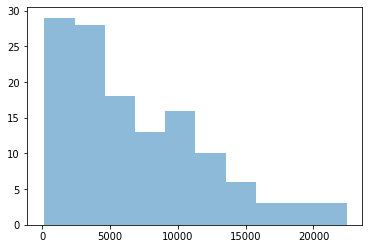

In [12]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

file_sigmas_max = name_dir+'sigmas_8.p'
sigmas_rl = pickle.load(open(file_sigmas_max, 'rb'))[-1]

sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)

This episode collected a score of =  38.73622629671324


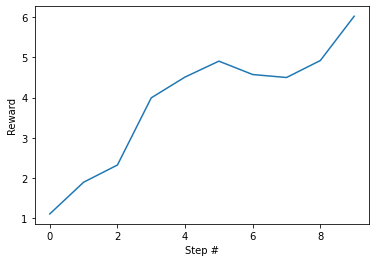

In [13]:
## Rewards of episode with min score
file_rew_min = name_dir+f'rew_{index_min}.p'
rew_min = pickle.load(open(file_rew_min, 'rb'))
plt.plot(np.arange(len(rew_min)), rew_min)
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(rew_min))

The last energy of the episode with min score is =  -0.0897058


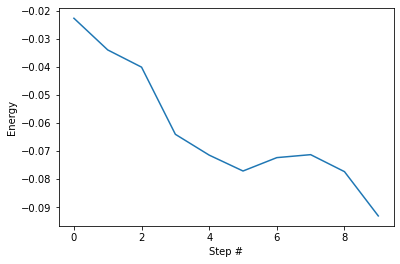

In [14]:
## Plot energies of episode with min score
file_en_min = name_dir+f'en_{index_min}.p'
en_min = pickle.load(open(file_en_min, 'rb'))
plt.plot(np.arange(len(en_min)), en_min)
plt.ylabel('Energy')
plt.xlabel('Step #')

print('The last energy of the episode with min score is = ', en_max[-1])

The last prin dim of the episode with min score is =  49


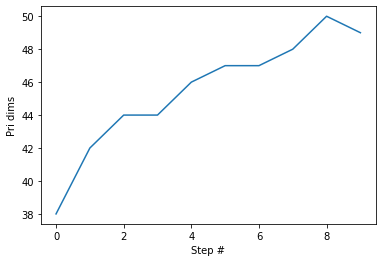

In [15]:
## Plot princip dim of episode with min score

file_pri_min = name_dir+f'pri_dim_{index_min}.p'
pri_min = pickle.load(open(file_pri_min, 'rb'))
plt.plot(np.arange(len(pri_min)), pri_min)
plt.ylabel('Pri dims')
plt.xlabel('Step #')

print('The last prin dim of the episode with min score is = ', pri_min[-1])

The last full dim of the episode with max score is =  50


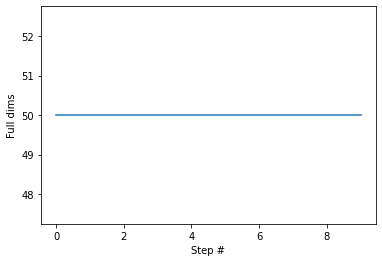

In [16]:
## Plot full dim of episode with min score

file_full_min = name_dir+f'full_dim_{index_min}.p'
full_min = pickle.load(open(file_full_min, 'rb'))
plt.plot(np.arange(len(full_min)), full_min)
plt.ylabel('Full dims')
plt.xlabel('Step #')

print('The last full dim of the episode with max score is = ', full_min[-1])

(array([ 9.,  4., 12.,  3.,  8.,  4.,  4.,  3.,  1.,  2.]),
 array([0.04322675, 0.20111147, 0.35899618, 0.51688087, 0.6747656 ,
        0.8326503 , 0.990535  , 1.1484197 , 1.3063045 , 1.4641892 ,
        1.6220739 ], dtype=float32),
 <BarContainer object of 10 artists>)

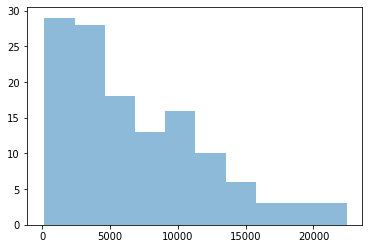

In [17]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

file_sigmas_min = name_dir+'sigmas_8.p'
sigmas_rl = pickle.load(open(file_sigmas_min, 'rb'))[-1]

sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)